In [1]:
%load_ext autoreload
%autoreload 2

import time
import pickle
import numpy as np
from scipy import optimize

import matplotlib.pyplot as plt   
plt.style.use('seaborn-v0_8-whitegrid')
prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']

from BabyMAKROModel import BabyMAKROModelClass

C:\Users\nbk863\AppData\Local\Temp\ipykernel_13996\3413739869.py:10: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


# Setup

In [2]:
model = BabyMAKROModelClass(name='baseline') # create an instance of the model

par = model.par
ss = model.ss
paramesol = model.sol

In [3]:
parameter = 'Lambda'
parvalues = [0.1,0.25,0.50]
ModelList = model.multi_model(parameter,parvalues)

Jacobian calculated in 1.0 mins 5 secs
Jacobian calculated in 30.7 secs
Jacobian calculated in 30.6 secs


# Find IRF

In [4]:
Tshock = 50
persistence = 0.80**np.arange(Tshock)
for i in range(len(ModelList)):
    ModelList[i].set_exo_ss()
    ModelList[i].set_unknowns_ss()

    shock = 0.01*ModelList[i].ss.G
    ModelList[i].sol.G[:Tshock] = ModelList[i].ss.G + shock*persistence

    ModelList[i].find_IRF()


initial:
t1-t0 = 0.01225 secs
it = 3
    max. abs. error = 3.13e-12
    6.38e-14 in A_R_ini_error
    4.00e-15 in Aq_diff
    5.66e-15 in bargaining_cond
    2.44e-15 in FOC_capital_agency
    9.84e-13 in FOC_K_ell
    3.13e-12 in mkt_clearing
    3.60e-14 in PC

solve: t1-t0 = 0.13364 secs
evaluate + update: t3-t2 = 0.07879 secs
initial:
t1-t0 = 0.02394 secs
it = 3
    max. abs. error = 2.97e-12
    8.56e-14 in A_R_ini_error
    3.11e-15 in Aq_diff
    5.33e-15 in bargaining_cond
    2.22e-15 in FOC_capital_agency
    1.07e-12 in FOC_K_ell
    2.97e-12 in mkt_clearing
    3.33e-14 in PC

solve: t1-t0 = 0.13191 secs
evaluate + update: t3-t2 = 0.07988 secs
initial:
t1-t0 = 0.02358 secs
it = 3
    max. abs. error = 2.90e-12
    8.88e-14 in A_R_ini_error
    3.11e-15 in Aq_diff
    5.33e-15 in bargaining_cond
    2.66e-15 in FOC_capital_agency
    1.18e-12 in FOC_K_ell
    2.90e-12 in mkt_clearing
    3.40e-14 in PC

solve: t1-t0 = 0.13764 secs
evaluate + update: t3-t2 = 0.08251 secs


## Figures

### Long view

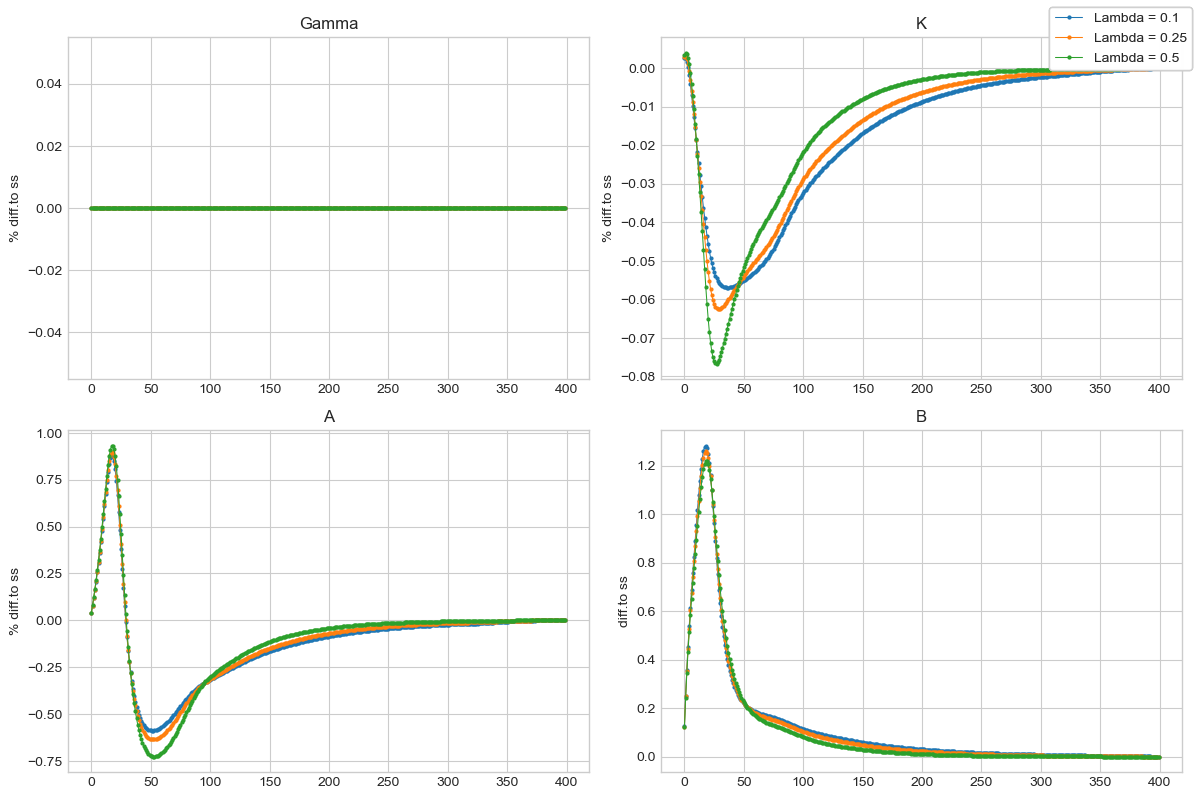

In [5]:
model.plot_IRF_models(ModelList,varlist=['Gamma','K','A','B'],T_IRF=par.T,ncol=2,parameter=parameter,parvalues=parvalues)

### National accouting - quantities

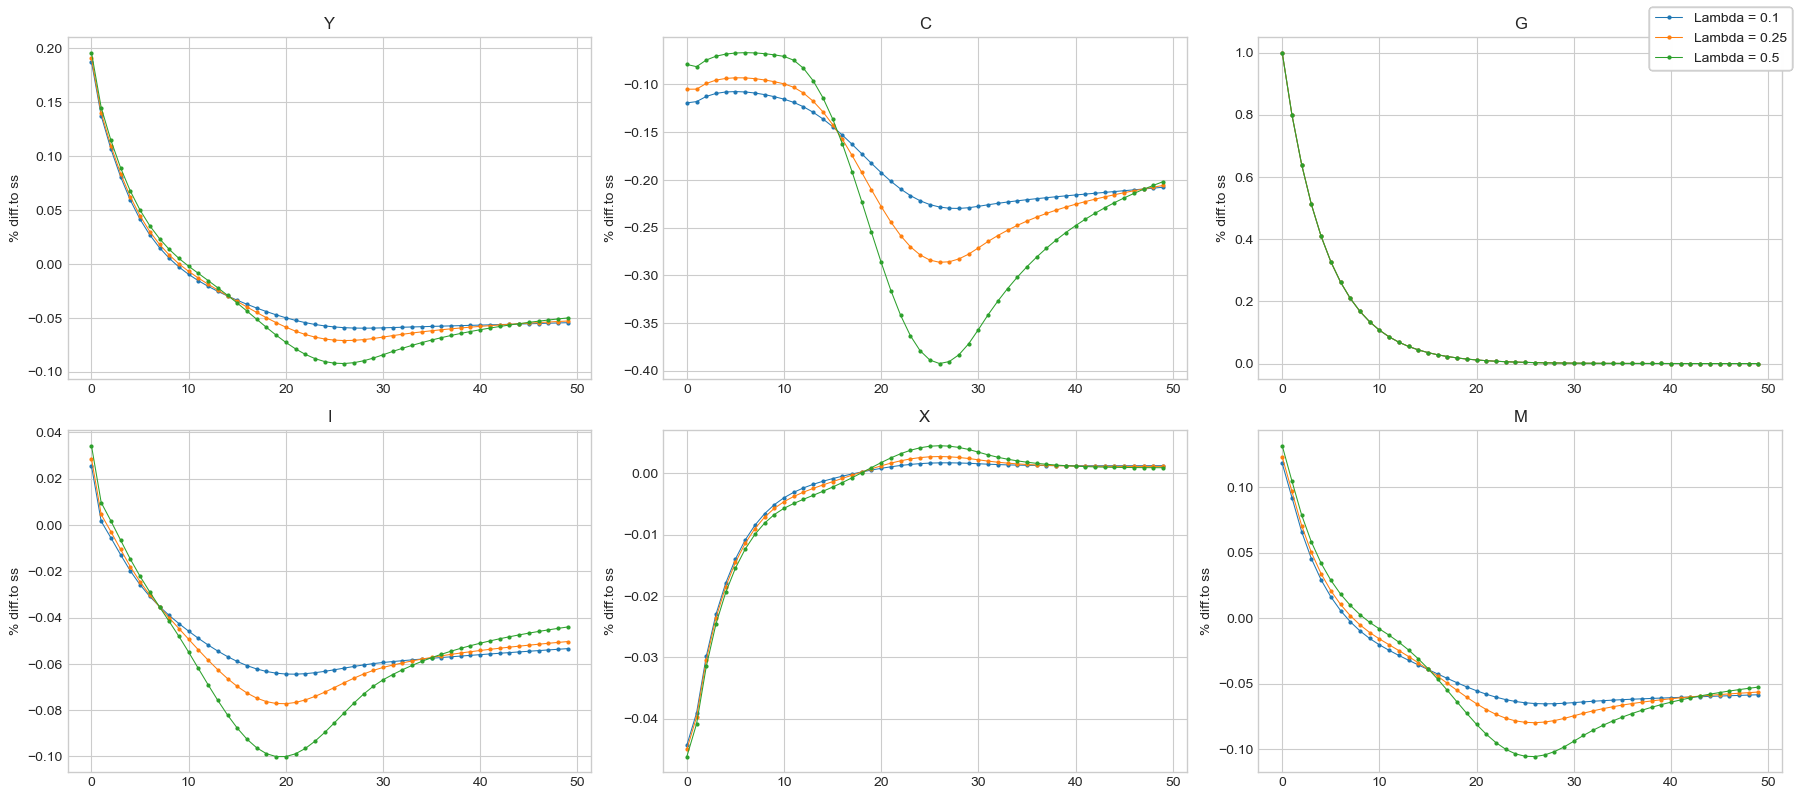

In [6]:
model.plot_IRF_models(ModelList,varlist=['Y','C','G','I','X','M'],parameter=parameter,parvalues=parvalues)

### National accouting - prices

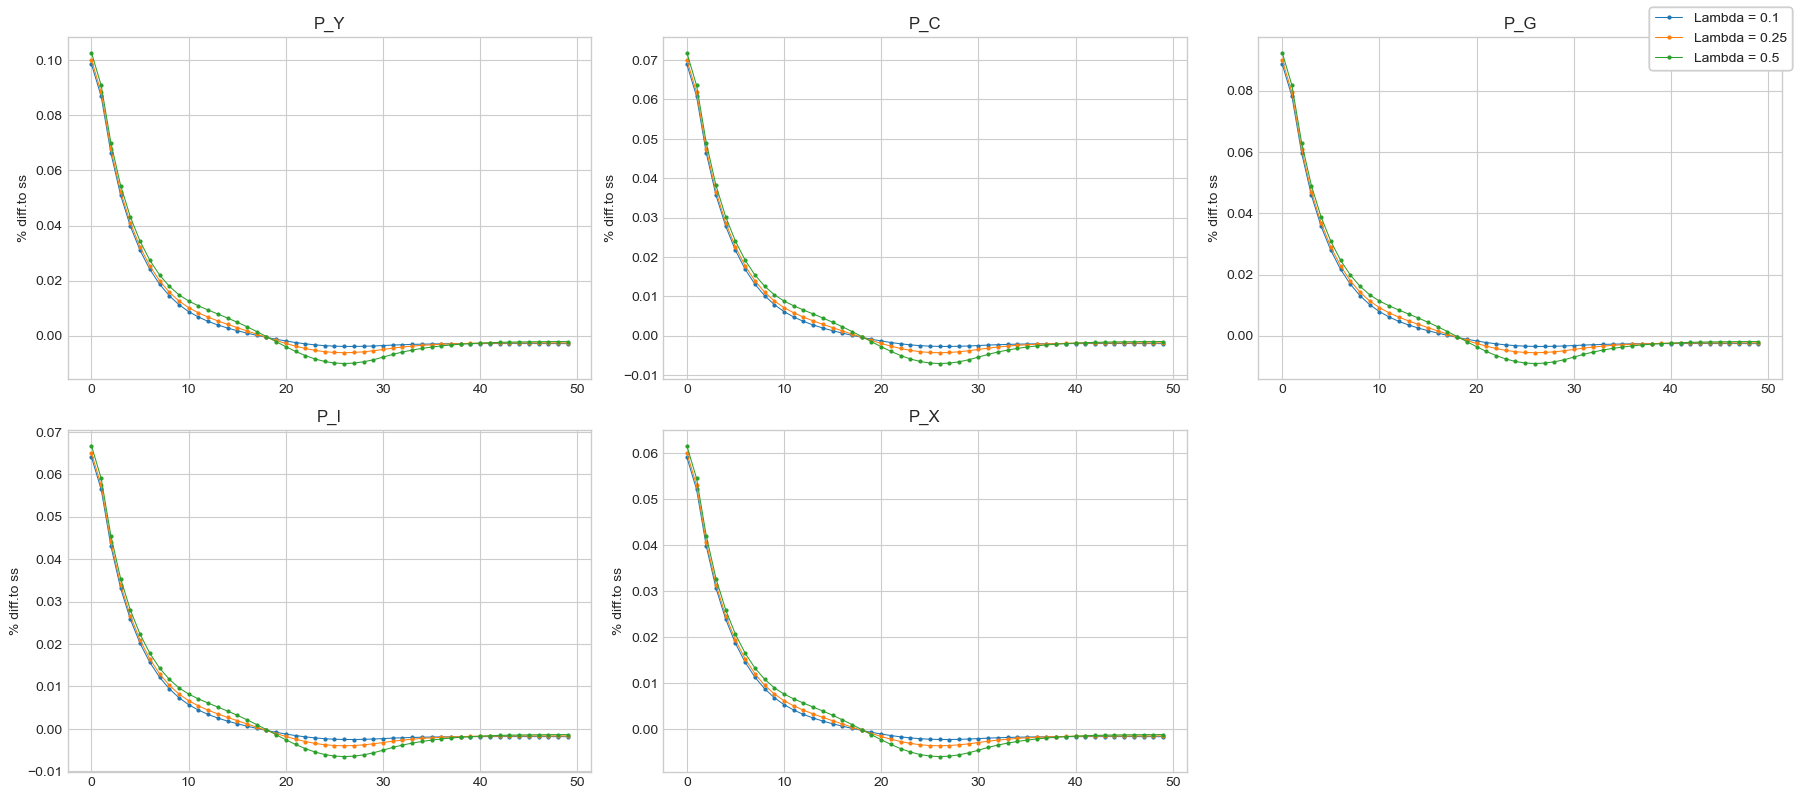

In [7]:
model.plot_IRF_models(ModelList,varlist=['P_Y','P_C','P_G','P_I','P_X'],parameter=parameter,parvalues=parvalues)

### Labor market

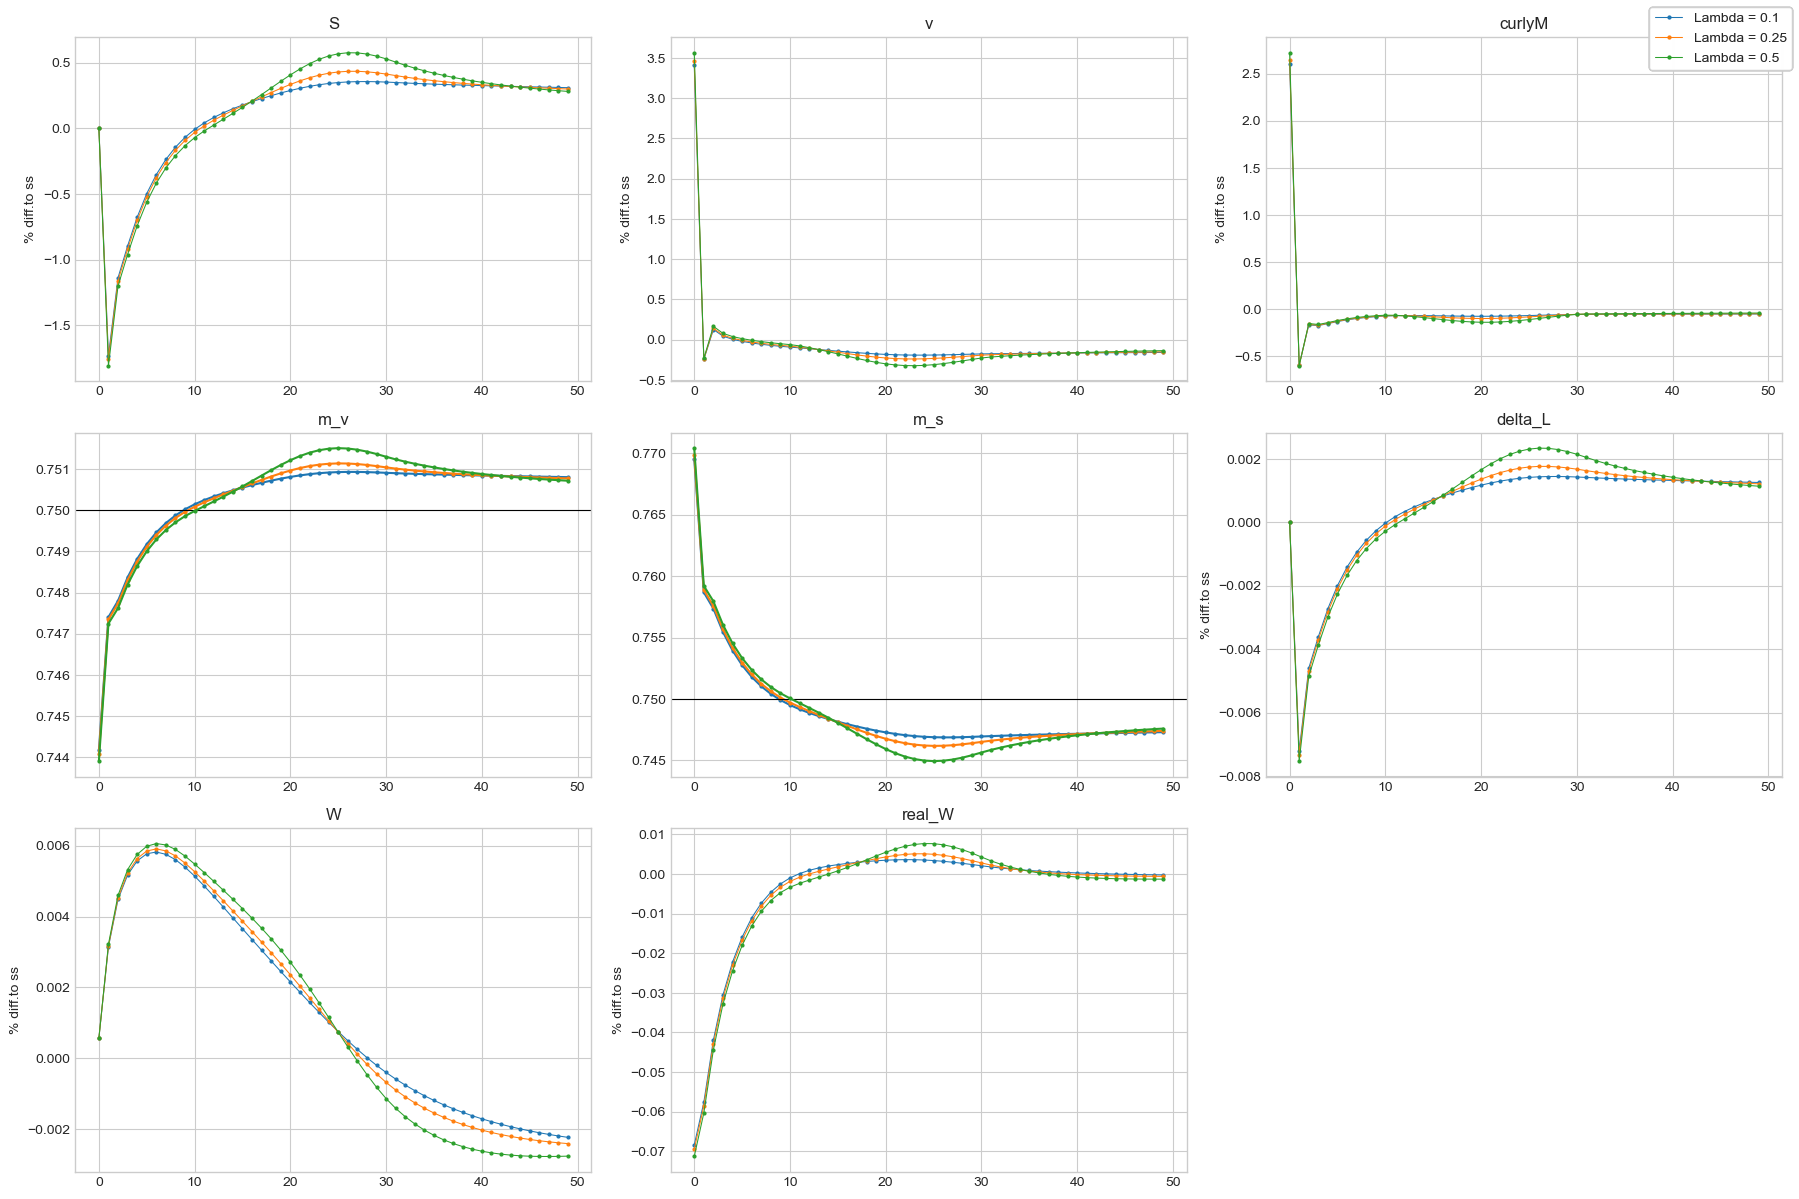

In [8]:
model.plot_IRF_models(ModelList,varlist=['S','v','curlyM','m_v','m_s','delta_L','W','real_W'],abs=['m_v','m_s'],parameter=parameter,parvalues=parvalues)

### Capital accumulation

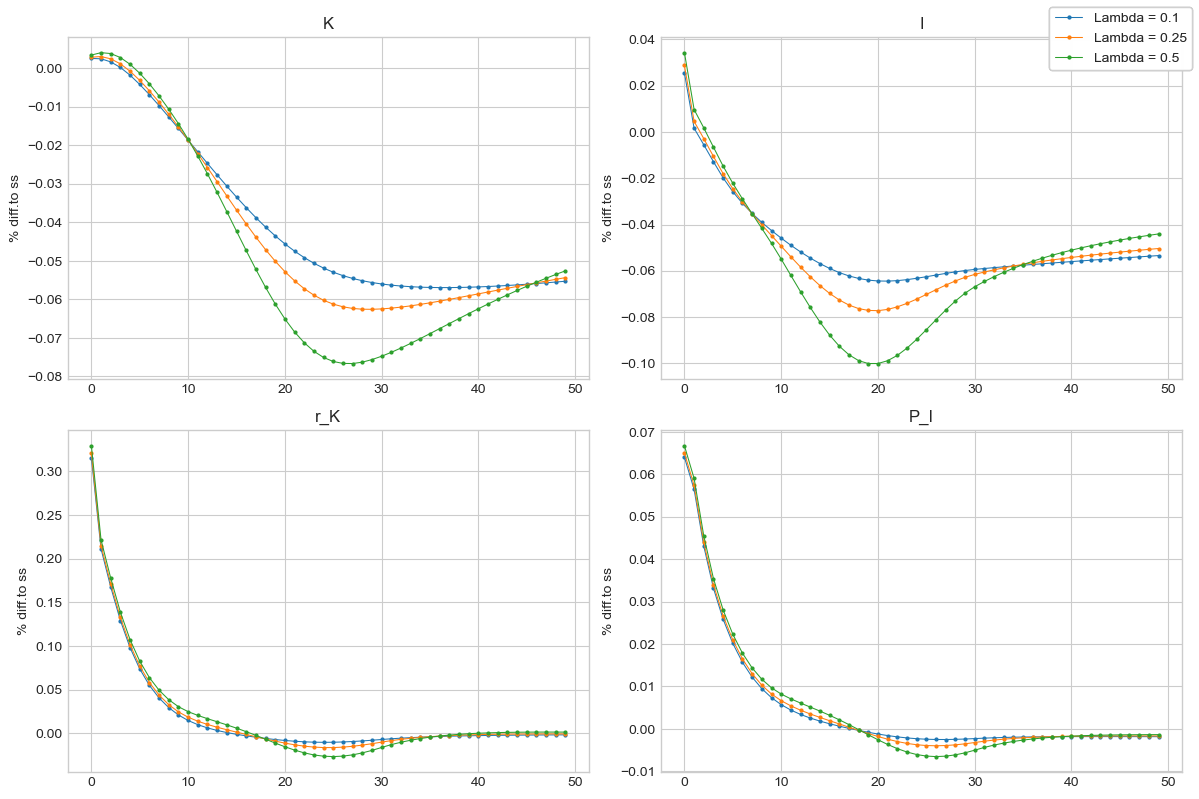

In [9]:
model.plot_IRF_models(ModelList,varlist=['K','I','r_K','P_I'],ncol=2,parameter=parameter,parvalues=parvalues)

### Production firms

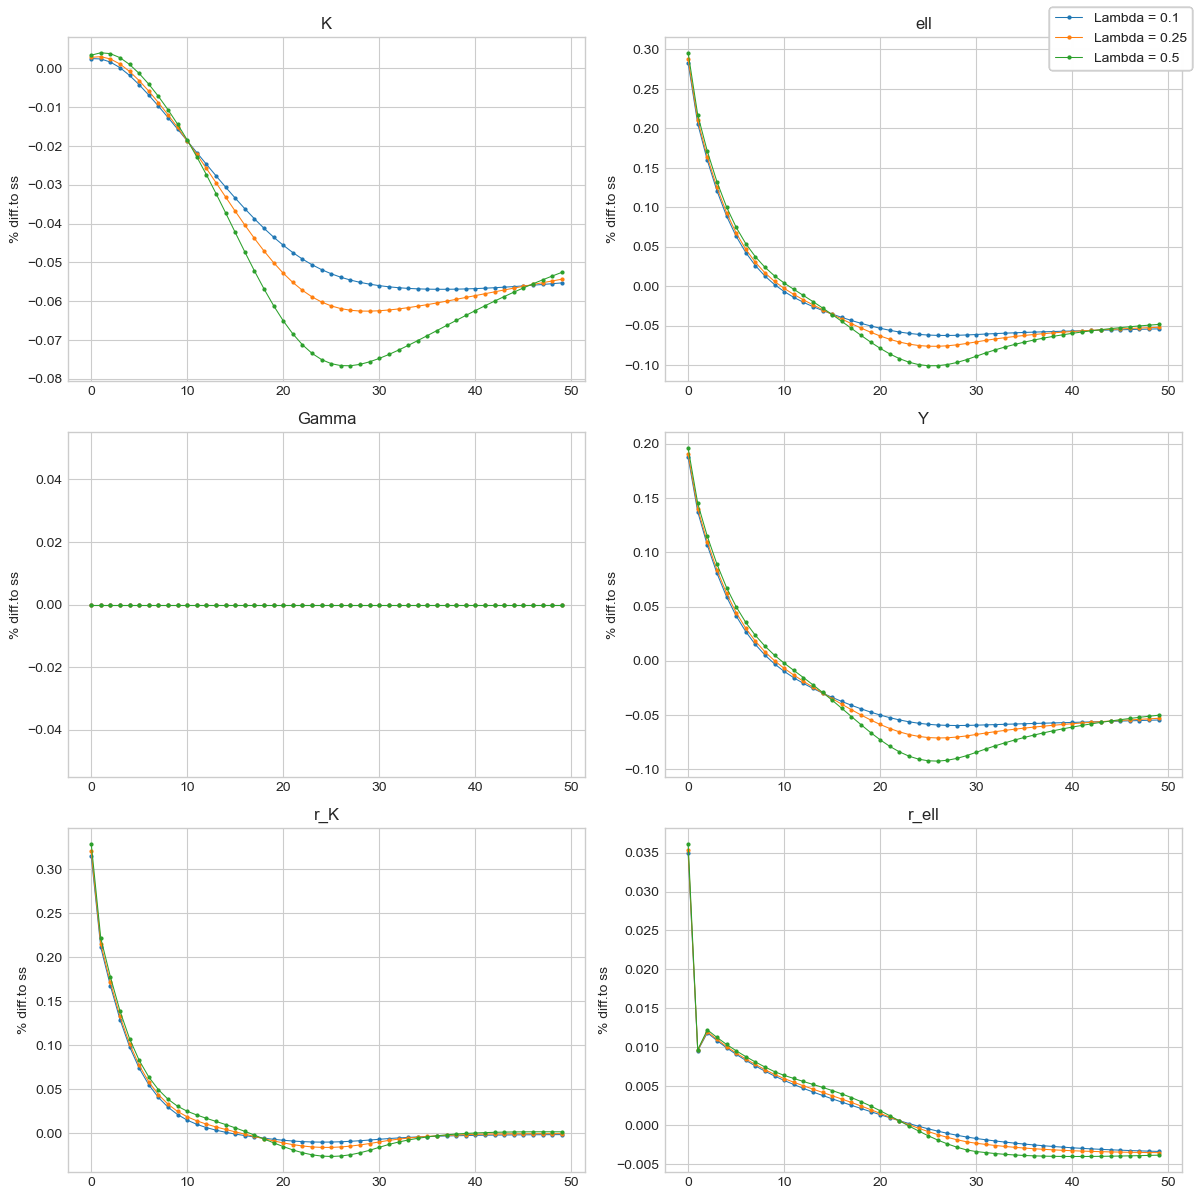

In [10]:
model.plot_IRF_models(ModelList,varlist=['K','ell','Gamma','Y','r_K','r_ell'],ncol=2,parameter=parameter,parvalues=parvalues)

### Phillips curve

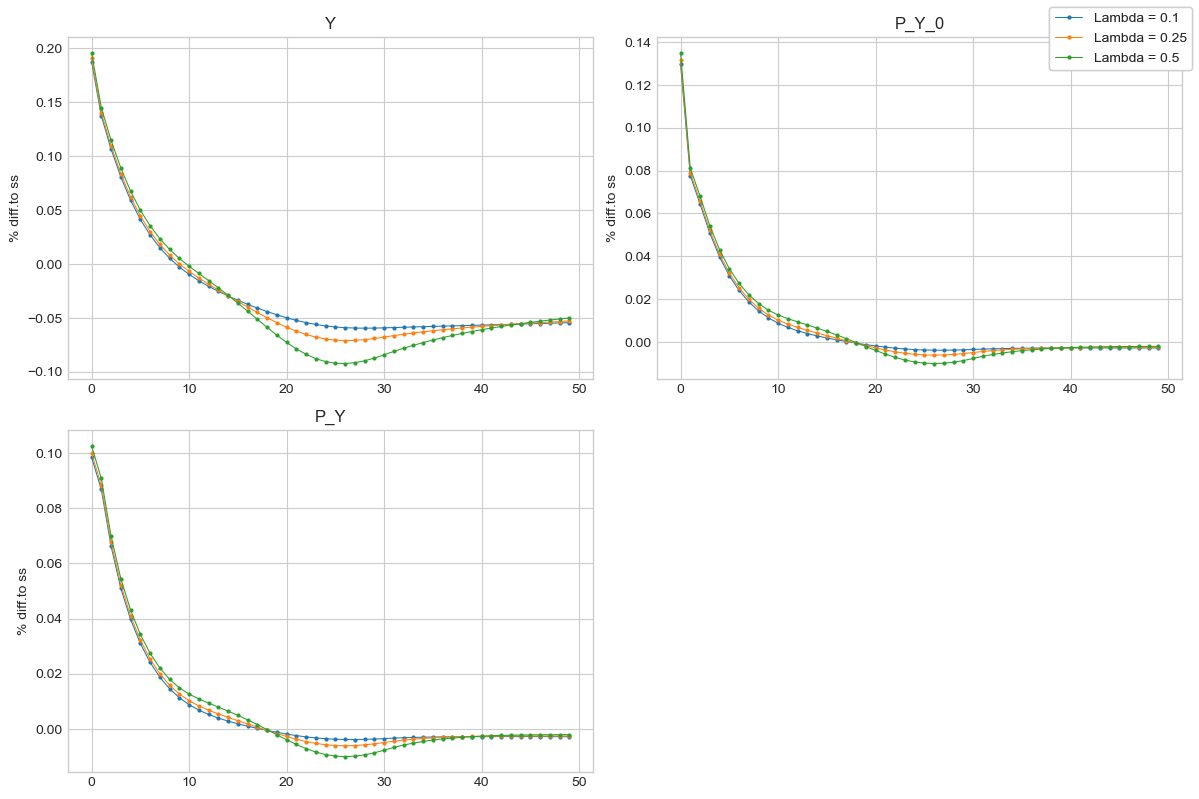

In [11]:
model.plot_IRF_models(ModelList,varlist=['Y','P_Y_0','P_Y'],ncol=2,parameter=parameter,parvalues=parvalues)

### Government

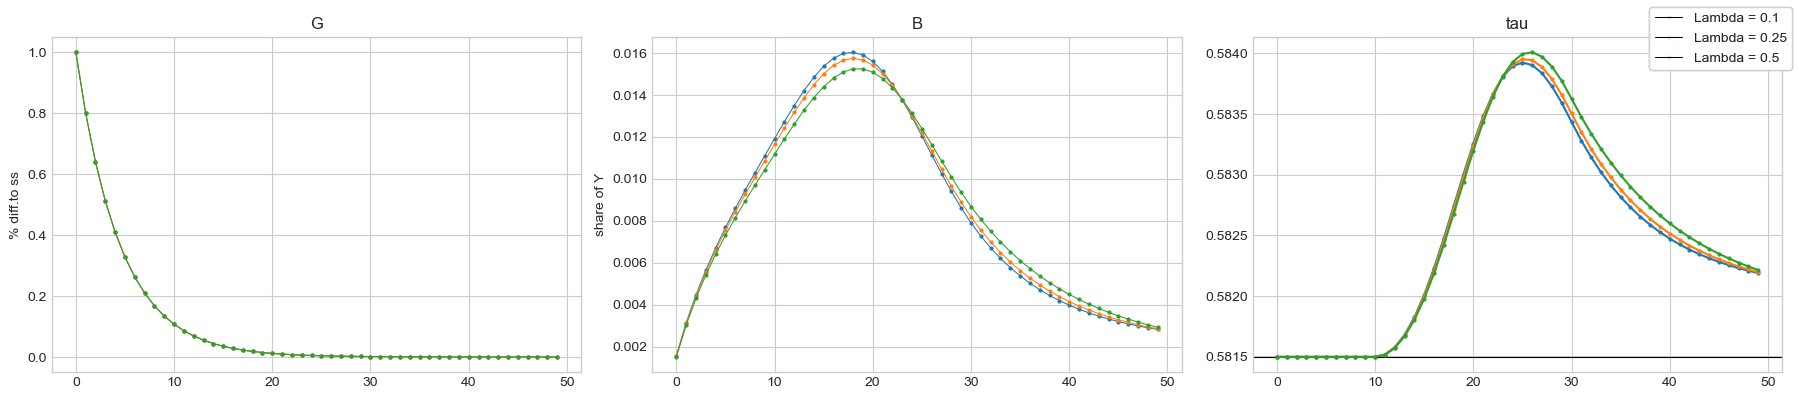

In [12]:
model.plot_IRF_models(ModelList,varlist=['G','B','tau'],abs=['tau'],Y_share=['B'],parameter=parameter,parvalues=parvalues)

### Households - aggregate

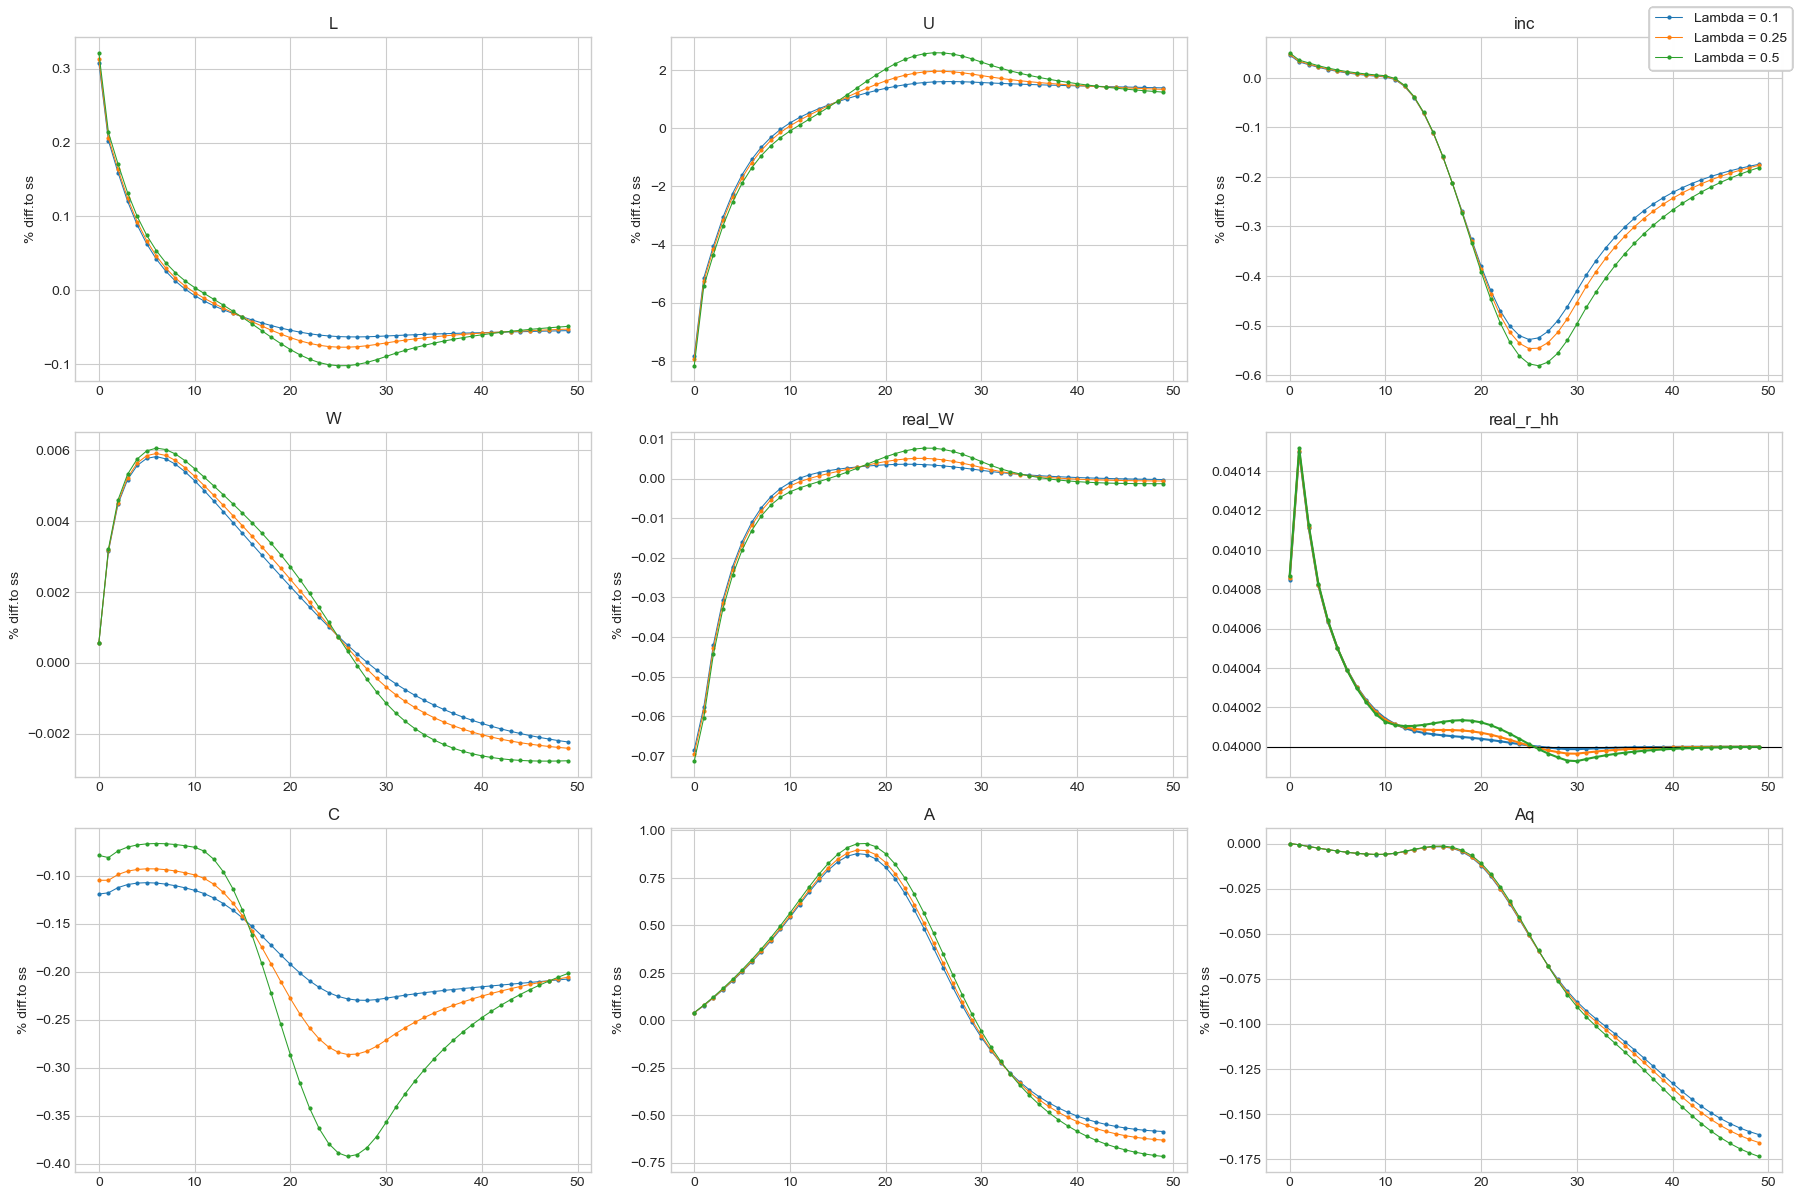

In [13]:
model.plot_IRF_models(ModelList,varlist=['L','U','inc','W','real_W','real_r_hh','C','A','Aq'],abs=['real_r_hh'],parameter=parameter,parvalues=parvalues)

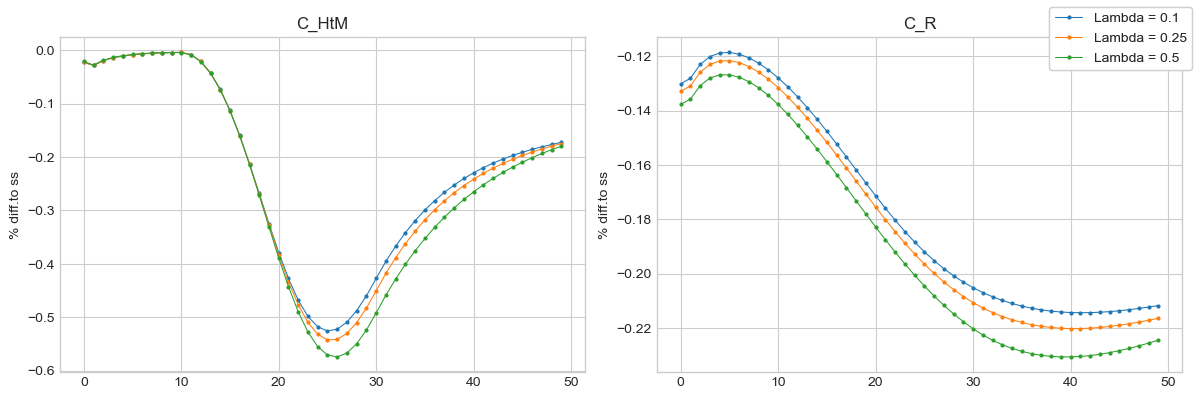

In [14]:
model.plot_IRF_models(ModelList,varlist=['C_HtM','C_R'],ncol=2,parameter=parameter,parvalues=parvalues)